In [20]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [138]:
df = pd.read_csv("/Users/sarkiss./Desktop/Sleep_health_and_lifestyle_dataset.csv")

df

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,None
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,370,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
370,371,Female,59,Nurse,8.0,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
371,372,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
372,373,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea


## Expanding the Dataset (Only Run Once)

Using a Statistical Technique called **Bootstrapping**, which repeatedly resamples a single dataset with replacement to create many simulated samples. We decided to create 6 separate bootstrapped datasets (that number can vary depending on the user) and then concatenated them all, using the pandas function **.concat(...)**, into a single dataset

In [140]:
# Number of bootstrapped datasets to create
num_bootstraps = 6

# Initialize an empty list to store bootstrapped datasets
bootstrapped_datasets = []

for _ in range(num_bootstraps):
    # Randomly sample rows with replacement to create a bootstrapped dataset
    bootstrapped_sample = df.sample(n = len(df), replace=True)
    
    # Append the bootstrapped dataset to the list
    bootstrapped_datasets.append(bootstrapped_sample)

#Save the bootstrapped datasets to separate CSV files
for i, bootstrapped_data in enumerate(bootstrapped_datasets):
    bootstrapped_data.to_csv(f'bootstrapped_dataset_{i}.csv', index=False)

In [124]:
df1 = pd.read_csv("/Users/sarkiss./Desktop/Computer Science/Machine Learning/Sleeping Disorder/bootstrapped_dataset_0.csv")
df2 = pd.read_csv("/Users/sarkiss./Desktop/Computer Science/Machine Learning/Sleeping Disorder/bootstrapped_dataset_1.csv")
df3 = pd.read_csv("/Users/sarkiss./Desktop/Computer Science/Machine Learning/Sleeping Disorder/bootstrapped_dataset_2.csv")
df4 = pd.read_csv("/Users/sarkiss./Desktop/Computer Science/Machine Learning/Sleeping Disorder/bootstrapped_dataset_3.csv")
df5 = pd.read_csv("/Users/sarkiss./Desktop/Computer Science/Machine Learning/Sleeping Disorder/bootstrapped_dataset_4.csv")
df6 = pd.read_csv("/Users/sarkiss./Desktop/Computer Science/Machine Learning/Sleeping Disorder/bootstrapped_dataset_5.csv")

#Concatenating all bootstrapped datasets into a single dataframe
dfs = [df1,df2,df3,df4,df5,df6]
df = pd.concat(dfs)
df

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,146,Female,38,Lawyer,7.4,7,60,5,Obese,135/88,84,3300,Sleep Apnea
1,285,Female,50,Nurse,6.0,6,90,8,Overweight,140/95,75,10000,Sleep Apnea
2,122,Female,37,Accountant,7.2,8,60,4,Normal,115/75,68,7000,None
3,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,16,Male,29,Doctor,6.0,6,30,8,Normal,120/80,70,8000,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,28,Male,30,Doctor,7.9,7,75,6,Normal,120/80,70,8000,None
370,39,Male,31,Doctor,7.6,7,75,6,Normal,120/80,70,8000,None
371,129,Male,38,Lawyer,7.3,8,60,5,Normal,130/85,68,8000,None
372,251,Female,45,Teacher,6.8,7,30,6,Overweight,135/90,65,6000,Insomnia


## Data Preprocessing

In [125]:
print(df.dtypes) #Printing the types of each feature 

Person ID                    int64
Gender                      object
Age                          int64
Occupation                  object
Sleep Duration             float64
Quality of Sleep             int64
Physical Activity Level      int64
Stress Level                 int64
BMI Category                object
Blood Pressure              object
Heart Rate                   int64
Daily Steps                  int64
Sleep Disorder              object
dtype: object


In [126]:
#Dropping Person ID column
df = df.drop(columns = ['Person ID'])

In [127]:
def describe_new(df): #function that adds range to the .describe() table
    df1 = df.describe() #stores  the original .describe() into df1
    df1.loc["range"] = df1.loc['max'] - df1.loc['min'] #creates another row for the ranges and calculates it by substracting max and min
    return df1

print(describe_new(df))

               Age  Sleep Duration  Quality of Sleep  Physical Activity Level  \
count  2244.000000     2244.000000       2244.000000              2244.000000   
mean     42.093583        7.148975          7.334670                59.307041   
std       8.788097        0.792505          1.188754                20.525176   
min      27.000000        5.800000          4.000000                30.000000   
25%      35.000000        6.400000          6.000000                45.000000   
50%      42.000000        7.200000          7.000000                60.000000   
75%      50.000000        7.800000          8.000000                75.000000   
max      59.000000        8.500000          9.000000                90.000000   
range    32.000000        2.700000          5.000000                60.000000   

       Stress Level   Heart Rate   Daily Steps  
count   2244.000000  2244.000000   2244.000000  
mean       5.348039    70.095365   6840.062389  
std        1.764208     4.102324   1618.36

In [128]:
#checking for missing values
missing_values = df.isnull().sum()
print(missing_values)


Gender                     0
Age                        0
Occupation                 0
Sleep Duration             0
Quality of Sleep           0
Physical Activity Level    0
Stress Level               0
BMI Category               0
Blood Pressure             0
Heart Rate                 0
Daily Steps                0
Sleep Disorder             0
dtype: int64


In [129]:
#Checks the dataset for any NA values
print(df.isna().sum())

Gender                     0
Age                        0
Occupation                 0
Sleep Duration             0
Quality of Sleep           0
Physical Activity Level    0
Stress Level               0
BMI Category               0
Blood Pressure             0
Heart Rate                 0
Daily Steps                0
Sleep Disorder             0
dtype: int64


In [130]:
#Checking value counts of each variable in Occupations
print(df['Occupation'].value_counts())

#There were a couple instances were it said "Sales Representatives", we change those to "Salesperson"
df = df.replace(['Sales Representative'], 'Salesperson') 

#Also changed "Software Engineer" to just "Engineer"
df = df.replace(['Software Engineer'], 'Engineer') 

#Removing 'Manager' rows, because of Class Imbalance
df = df[df['Occupation'] != 'Manager']

print('\n', df['Occupation'].value_counts())

Nurse                   440
Doctor                  422
Engineer                389
Lawyer                  279
Teacher                 236
Accountant              220
Salesperson             177
Scientist                34
Software Engineer        30
Sales Representative     10
Manager                   7
Name: Occupation, dtype: int64

 Nurse          440
Doctor         422
Engineer       419
Lawyer         279
Teacher        236
Accountant     220
Salesperson    187
Scientist       34
Name: Occupation, dtype: int64


In [131]:
#Checking value counts of each variable in BMI Category
print(df['BMI Category'].value_counts()) 

#There were some instances were it said "Normal Weight" instead of Normal, we were able to manually change those
#One of the normal had a space, we couldnt find it manually so we used .replace(...) function to fix it
df = df.replace(['Normal Weight'], 'Normal') 
print('\n', df['BMI Category'].value_counts()) 

Normal           1194
Overweight        857
Normal Weight     130
Obese              56
Name: BMI Category, dtype: int64

 Normal        1324
Overweight     857
Obese           56
Name: BMI Category, dtype: int64


##### Blood pressure was initially a string type, we wanted it to be a float, so we created a new dataframe splitting it in two, Upper and Lower pressure

In [132]:
#Splitting Blood Pressure to Upper Value and Lower Value
df = pd.concat([df, df['Blood Pressure'].str.split('/', expand=True)], axis=1).drop('Blood Pressure', axis=1)
df = df.rename(columns={0: 'BloodPressure_Upper_Value', 1: 'BloodPressure_Lower_Value'})

#Changing Blood Pressure Upper and Lower Values to type float
df['BloodPressure_Upper_Value'] = df['BloodPressure_Upper_Value'].astype(float)
df['BloodPressure_Lower_Value'] = df['BloodPressure_Lower_Value'].astype(float)

df

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Heart Rate,Daily Steps,Sleep Disorder,BloodPressure_Upper_Value,BloodPressure_Lower_Value
0,Female,38,Lawyer,7.4,7,60,5,Obese,84,3300,Sleep Apnea,135.0,88.0
1,Female,50,Nurse,6.0,6,90,8,Overweight,75,10000,Sleep Apnea,140.0,95.0
2,Female,37,Accountant,7.2,8,60,4,Normal,68,7000,None,115.0,75.0
3,Male,28,Salesperson,5.9,4,30,8,Obese,85,3000,Sleep Apnea,140.0,90.0
4,Male,29,Doctor,6.0,6,30,8,Normal,70,8000,None,120.0,80.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,Male,30,Doctor,7.9,7,75,6,Normal,70,8000,None,120.0,80.0
370,Male,31,Doctor,7.6,7,75,6,Normal,70,8000,None,120.0,80.0
371,Male,38,Lawyer,7.3,8,60,5,Normal,68,8000,None,130.0,85.0
372,Female,45,Teacher,6.8,7,30,6,Overweight,65,6000,Insomnia,135.0,90.0


In [133]:
df.info() #function that shows all info of the database: # of tuples, # of columns, features, types, etc.

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2237 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Gender                     2237 non-null   object 
 1   Age                        2237 non-null   int64  
 2   Occupation                 2237 non-null   object 
 3   Sleep Duration             2237 non-null   float64
 4   Quality of Sleep           2237 non-null   int64  
 5   Physical Activity Level    2237 non-null   int64  
 6   Stress Level               2237 non-null   int64  
 7   BMI Category               2237 non-null   object 
 8   Heart Rate                 2237 non-null   int64  
 9   Daily Steps                2237 non-null   int64  
 10  Sleep Disorder             2237 non-null   object 
 11  BloodPressure_Upper_Value  2237 non-null   float64
 12  BloodPressure_Lower_Value  2237 non-null   float64
dtypes: float64(3), int64(6), object(4)
memory usage: 

## Visualization of Data to find Coorelation

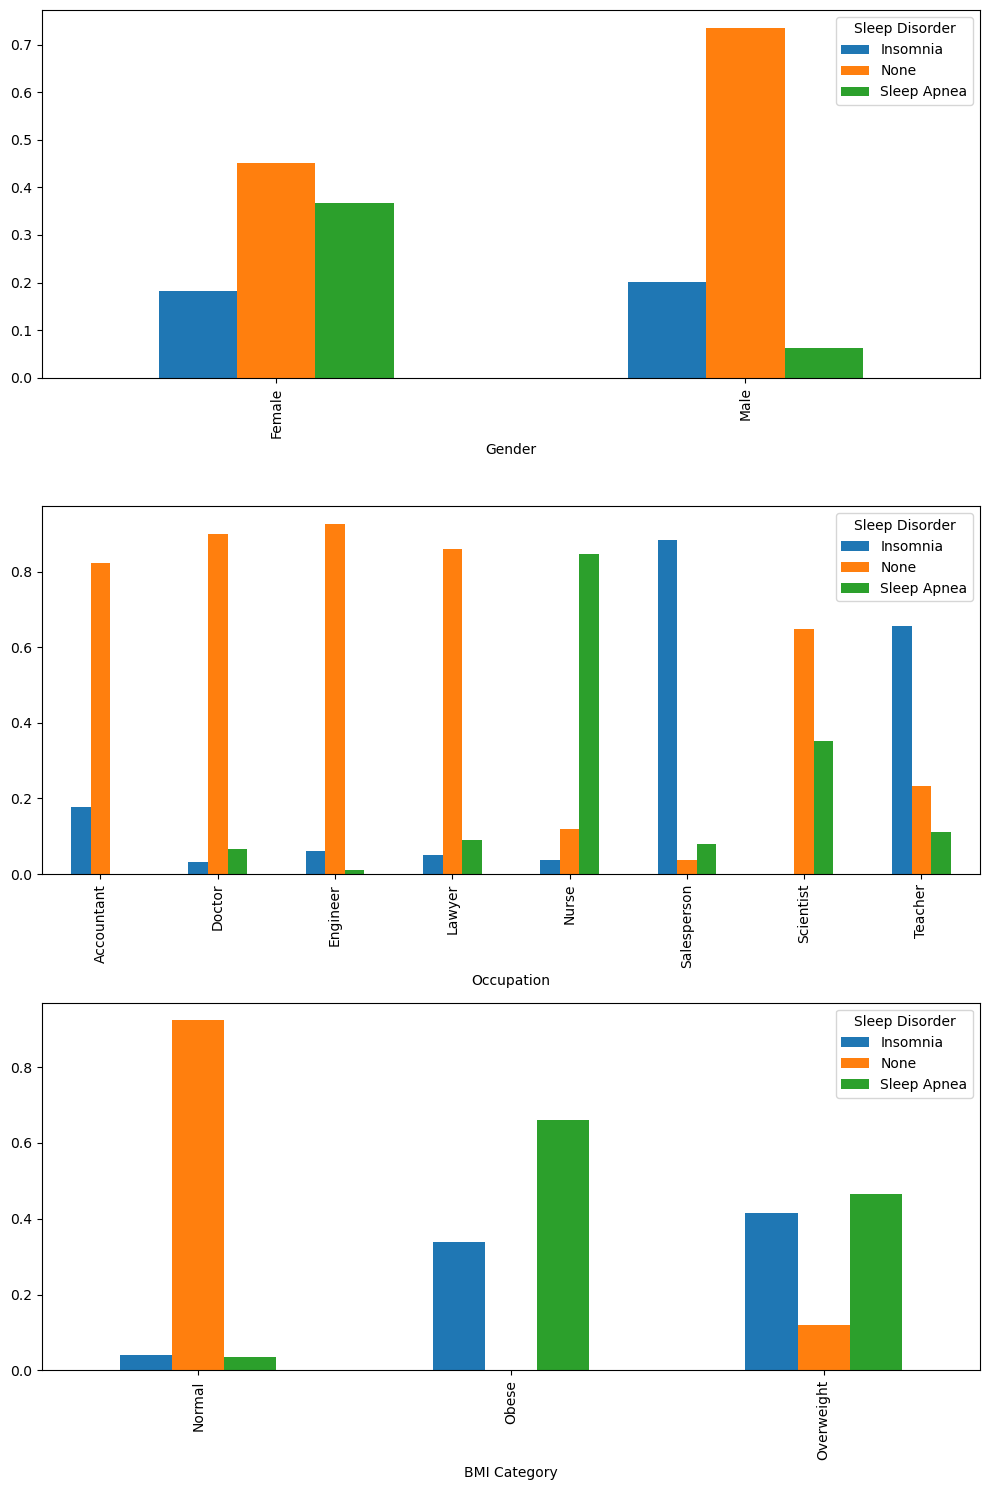

In [134]:
fig, axs = plt.subplots(3, 1, figsize=(10, 15))
plt.subplots_adjust(wspace=0.5, hspace=0.5)

categorical_x = ["Gender", "Occupation", "BMI Category"]

for i,cat in enumerate(categorical_x):
    
    counts = (df.groupby([cat])['Sleep Disorder']
                      .value_counts(normalize = True)
                      .unstack())

    counts.plot(kind='bar', ax=axs[i])
    
fig.tight_layout()

array([[<Axes: xlabel='Age', ylabel='Age'>,
        <Axes: xlabel='Sleep Duration', ylabel='Age'>,
        <Axes: xlabel='Quality of Sleep', ylabel='Age'>,
        <Axes: xlabel='Physical Activity Level', ylabel='Age'>,
        <Axes: xlabel='Stress Level', ylabel='Age'>,
        <Axes: xlabel='Heart Rate', ylabel='Age'>,
        <Axes: xlabel='Daily Steps', ylabel='Age'>,
        <Axes: xlabel='BloodPressure_Upper_Value', ylabel='Age'>,
        <Axes: xlabel='BloodPressure_Lower_Value', ylabel='Age'>],
       [<Axes: xlabel='Age', ylabel='Sleep Duration'>,
        <Axes: xlabel='Sleep Duration', ylabel='Sleep Duration'>,
        <Axes: xlabel='Quality of Sleep', ylabel='Sleep Duration'>,
        <Axes: xlabel='Physical Activity Level', ylabel='Sleep Duration'>,
        <Axes: xlabel='Stress Level', ylabel='Sleep Duration'>,
        <Axes: xlabel='Heart Rate', ylabel='Sleep Duration'>,
        <Axes: xlabel='Daily Steps', ylabel='Sleep Duration'>,
        <Axes: xlabel='BloodPressure_U

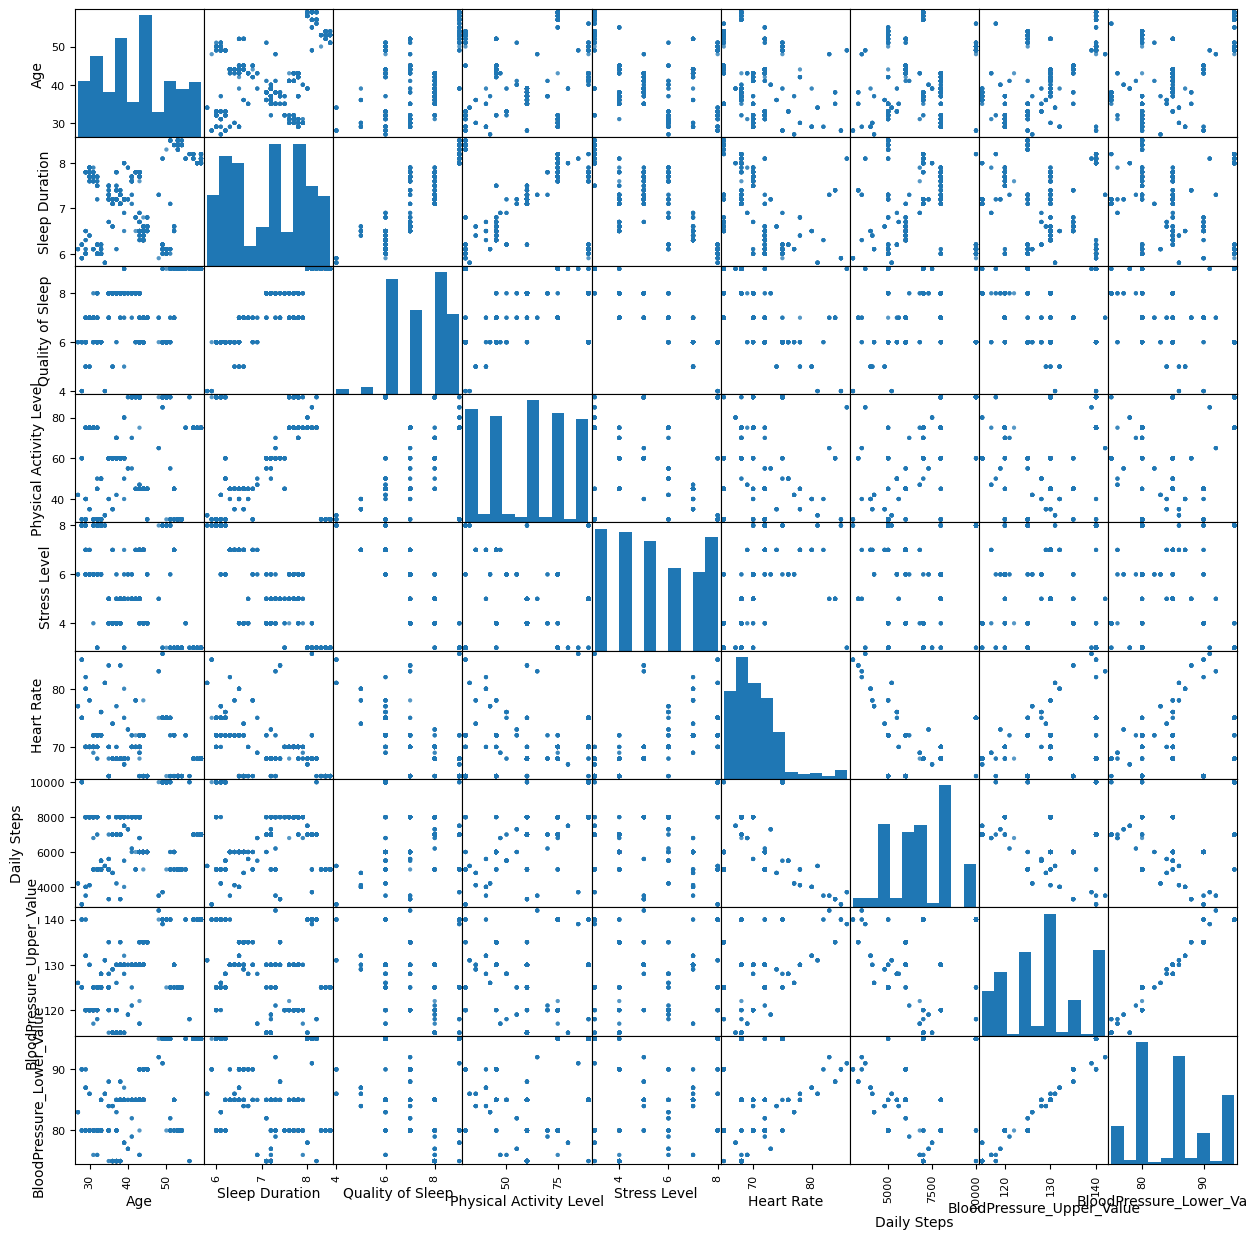

In [135]:
pd.plotting.scatter_matrix(df, figsize = (15,15))

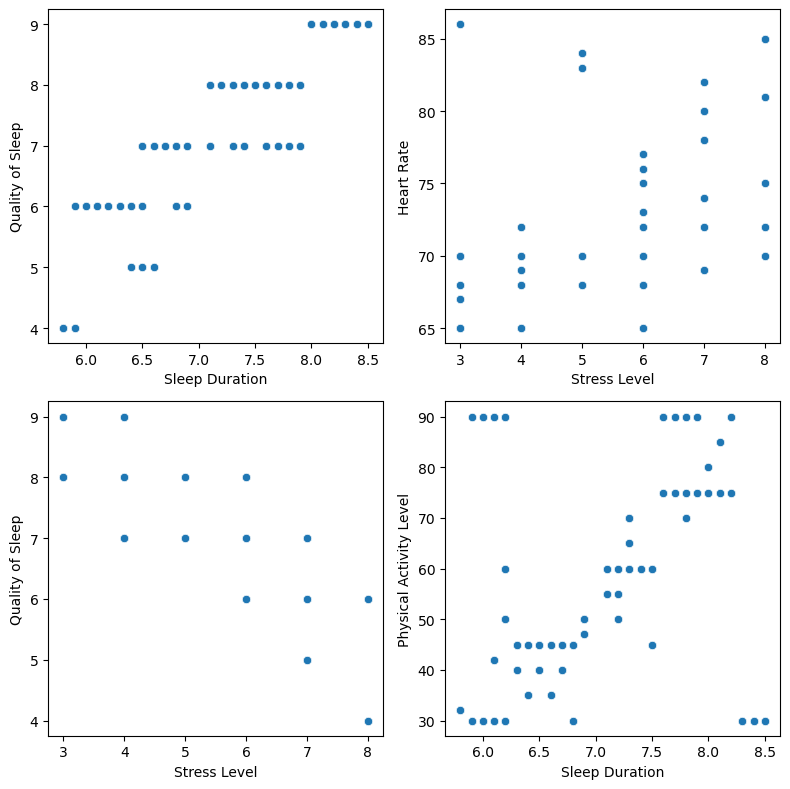

In [136]:
fig, axes = plt.subplots(2, 2, figsize=(8, 8))#Creates four separate boxplots, 
                                             #figsize enlarges the plots so that it is more visble

sns.scatterplot(df, x = 'Sleep Duration', y = 'Quality of Sleep', ax = axes[0,0])
sns.scatterplot(df, x = 'Stress Level', y = 'Quality of Sleep', ax = axes[1,0])
sns.scatterplot(df, x = 'Stress Level', y = 'Heart Rate', ax = axes[0,1])
sns.scatterplot(df, x = 'Sleep Duration', y = 'Physical Activity Level', ax = axes[1,1])

fig.tight_layout() #Separates the subplots so that they're not cramped together

<Axes: xlabel='Sleep Disorder', ylabel='BloodPressure_Lower_Value'>

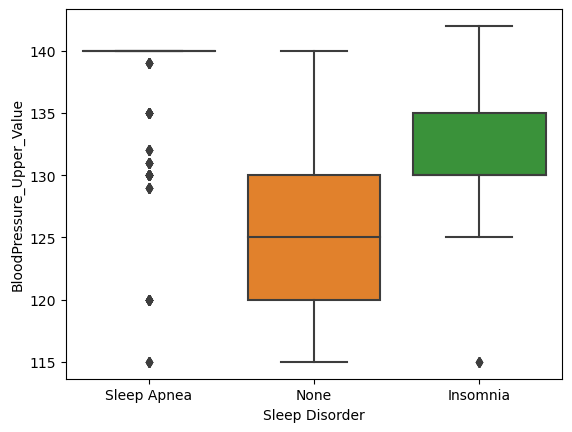

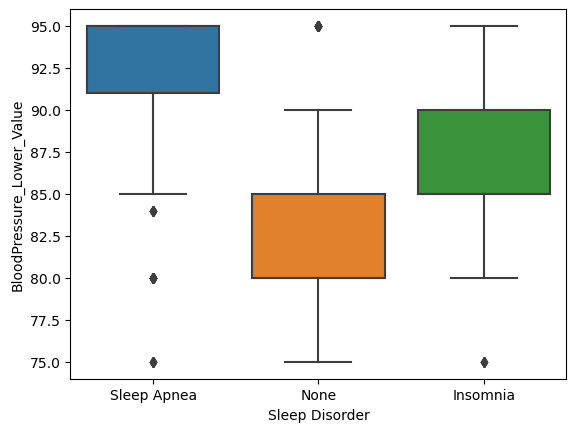

In [137]:

plt.figure(1)
sns.boxplot(data = df, x = "Sleep Disorder", y = "BloodPressure_Upper_Value")

plt.figure(2)
sns.boxplot(data = df, x = "Sleep Disorder", y = "BloodPressure_Lower_Value")


In [138]:
#Converting Gender to Numerical Values
df = df.replace(['Male'], 0) 
df = df.replace(['Female'], 1) 

#Converting Sleep Disorder to Numerical Values
df = df.replace(['Normal'], 0) 
df = df.replace(['Overweight'], 1) 
df = df.replace(['Obese'], 2) 

#Converting Sleep Disorder to Numerical Values
df = df.replace(['None'], 0) 
df = df.replace(['Insomnia'], 1) 
df = df.replace(['Sleep Apnea'], 2) 
df

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Heart Rate,Daily Steps,Sleep Disorder,BloodPressure_Upper_Value,BloodPressure_Lower_Value
0,1,38,Lawyer,7.4,7,60,5,2,84,3300,2,135.0,88.0
1,1,50,Nurse,6.0,6,90,8,1,75,10000,2,140.0,95.0
2,1,37,Accountant,7.2,8,60,4,0,68,7000,0,115.0,75.0
3,0,28,Salesperson,5.9,4,30,8,2,85,3000,2,140.0,90.0
4,0,29,Doctor,6.0,6,30,8,0,70,8000,0,120.0,80.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,0,30,Doctor,7.9,7,75,6,0,70,8000,0,120.0,80.0
370,0,31,Doctor,7.6,7,75,6,0,70,8000,0,120.0,80.0
371,0,38,Lawyer,7.3,8,60,5,0,68,8000,0,130.0,85.0
372,1,45,Teacher,6.8,7,30,6,1,65,6000,1,135.0,90.0


<Axes: >

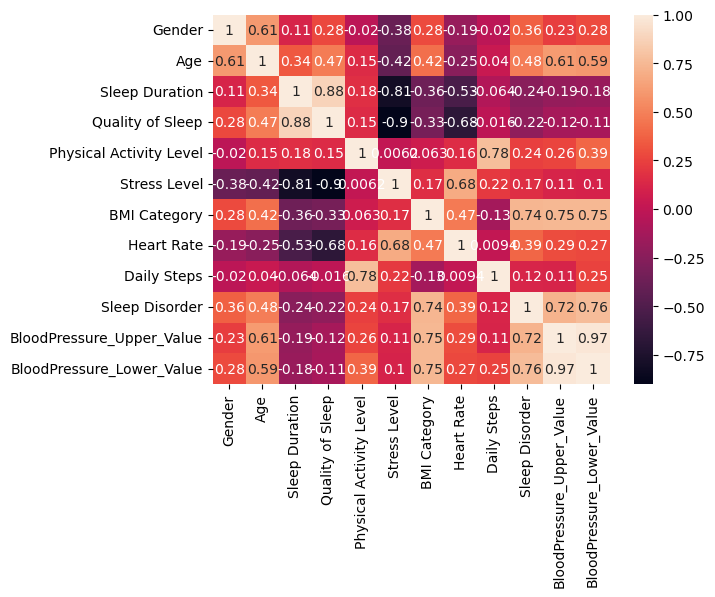

In [139]:
sns.heatmap(df.corr(numeric_only = True), annot = True)